In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

#### read in file

In [44]:
fname = '../out/20.0216 feat/reg_rf_boruta/cytoscape/undirected_stats/undirected_deg_gt1.netstats'

In [84]:
process = False
hist = list()
add = False
with open(fname, 'r') as f:
    for line in f:
        if line.startswith('degreeDist'):
            add = True
            continue
        elif line.startswith('cksDist'):
            add = False
            break
        if add:
            v = line.split('\t')
            hist.append((int(v[0]), int(re.sub('\n','',v[1]))))

In [264]:
df = pd.DataFrame(hist, columns=['degree', 'n'])
df = df.loc[df.degree>1,:]

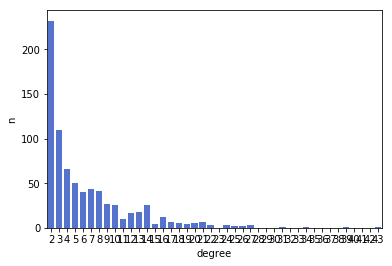

In [163]:
sns.barplot(df['degree'], df['n'], color='royalblue')

/Users/boyangzhao/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


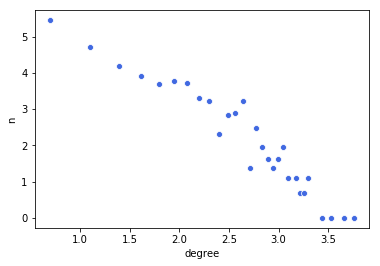

In [164]:
sns.scatterplot(np.log(df['degree']), np.log(df['n']), color='royalblue')

#### powerlaw package

In [ ]:
data = [[d]*n for d,n in zip(df.degree.values, df.n.values)]
data = [item for sublist in data for item in sublist]

In [166]:
results = powerlaw.Fit(data)

Calculating best minimal value for power law fit


In [167]:
print(results.power_law.alpha)
print(results.power_law.xmin)

4.7302278846590475
13.0


In [168]:
from scipy.stats import kstest
print('powerlaw', kstest(data, 
                         "powerlaw", args=(results.power_law.alpha, results.power_law.xmin), 
                         N=len(data)))

powerlaw KstestResult(statistic=0.8877284595300261, pvalue=0.0)


In [177]:
from scipy.stats import powerlaw as pl
x = np.logspace(1,100,10)
pl.mean(x, 4,10)

array([13.09090909, 14.        , 14.        , 14.        , 14.        ,
       14.        , 14.        , 14.        , 14.        , 14.        ])

In [169]:
R, p = results.distribution_compare('power_law', 'exponential')
print(R)
print(p)

2.1979198967626874
0.35457175506974703


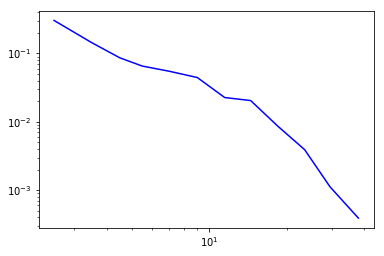

In [170]:
powerlaw.plot_pdf(data, color='b')

[Text(0,0.5,'PDF(degree) or CDF(degree)'), Text(0.5,0,'Degree')]

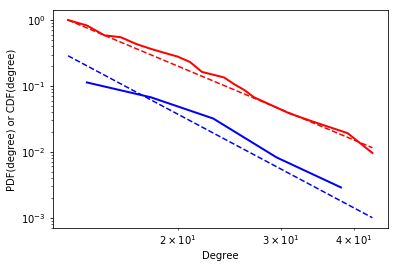

In [171]:
fig = results.plot_pdf(color='b', linewidth=2)
results.power_law.plot_pdf(color='b', linestyle='--', ax=fig)
results.plot_ccdf(color='r', linewidth=2, ax=fig)
results.power_law.plot_ccdf(color='r', linestyle='--', ax=fig)
ax = plt.gca()
ax.set(xlabel='Degree', ylabel='PDF(degree) or CDF(degree)')

[Text(0,0.5,'PDF(degree)'), Text(0.5,0,'Degree')]

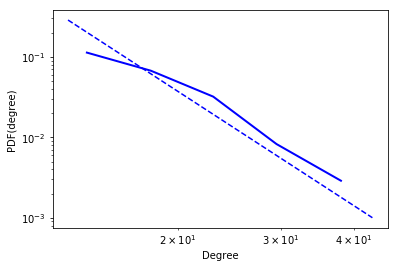

In [172]:
fig = results.plot_pdf(color='b', linewidth=2)
results.power_law.plot_pdf(color='b', linestyle='--', ax=fig)
ax = plt.gca()
ax.set(xlabel='Degree', ylabel='PDF(degree)')

#### scipy fit

In [265]:
from scipy.optimize import curve_fit
pl = lambda x, a, b: a * (x**b)
popt, pcov = curve_fit(pl, df.degree, df.n,  maxfev=10000)

In [266]:
popt

array([674.04500023,  -1.57175675])

/Users/boyangzhao/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


[(-0.6931471805599453, 6.907755278982137), (0.0, 3.912023005428146)]

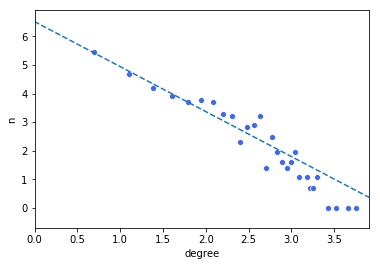

In [267]:
x = np.linspace(0.5,50,100)
sns.scatterplot(np.log(df.degree), np.log(df.n), color='royalblue')
plt.plot(np.log(x), np.log(pl(x, *popt)), '--')
ax = plt.gca()
ax.set(xlim=np.log([1,50]), ylim=np.log([0.5,1000]))

[None,
 (0.5, 1000),
 Text(0,0.5,'Number of nodes'),
 None,
 (1, 50),
 Text(0.5,0,'Degree')]

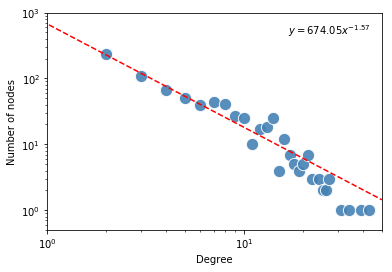

In [306]:
x = np.linspace(0.5,50,100)
ax = sns.scatterplot(df.degree, df.n, color='steelblue', s=150, alpha=0.9, linewidth=1)
plt.plot(x, pl(x, *popt), '--', color='r')
textstr = r'$y = %0.2f x^{%0.2f}$' % (popt[0], popt[1])
ax.text(0.72, 0.9, textstr, transform=ax.transAxes, fontsize=10)
ax = plt.gca()
ax.set(xlim=[1,50], ylim=[0.5,1000], yscale='log', xscale='log',
      xlabel='Degree', ylabel='Number of nodes')